HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

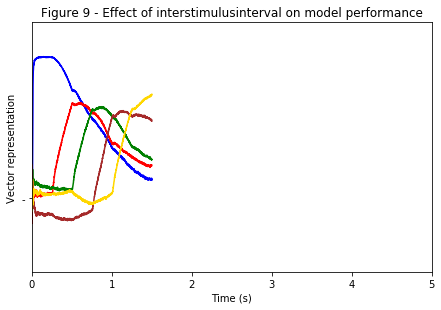

In [2]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
%matplotlib inline
# with and without seed
import numpy as np
import random
import numpy as np
import pickle
d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 3
proportion_ablate = 0.0
noise_std = 0.005
time_interval = 0.25
wait =  0.0
feedback_synapse = 0.1

with spa.Network() as model:
        
       
        feedback = 1        
 
            
        noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
        timer = time_interval + wait
        vocab = spa.Vocabulary(d)
        vocab.populate('BLUE; RED; GREEN; BROWN; GOLD')
      
        BLUE = vocab.parse('BLUE')
        RED = vocab.parse('RED')
        GREEN = vocab.parse('GREEN')
        BROWN = vocab.parse('BROWN')
        GOLD = vocab.parse('GOLD')
            
       
        Color = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        Color_1 = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        Color_2 = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        
        nengo.Connection(noise,Color.input, synapse = 0.01)
        
        Color >> Color_1
        Color_1 >> Color_2
        
        def input(t):
                if t < time_interval:
                    return BLUE
                elif t < timer:
                    return '0'
                elif t < timer + time_interval:
                    return RED
                elif t < 2 * timer:
                    return '0'
                elif t < 2 * timer + time_interval:
                    return GREEN
                elif t < 3 * timer:
                    return '0'
                elif t < 3 * timer + time_interval:
                    return BROWN
                elif t < 4 * timer:
                    return '0'
                elif t < 4 * timer + time_interval:
                    return GOLD
                elif t < 5 * timer:
                    return '0'         
                else:
                    return '0'
        
        
        color_trans = spa.Transcode(function = input, output_vocab = vocab)
        color_trans >> Color
        probe_Color_2 = nengo.Probe(Color_2.output, synapse = 0.01) 
        
        def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000



        
        with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
               
                sim.run(timer * 6)  
        
        numbers  = spa.similarity(sim.data[probe_Color_2], vocab, normalize = True)
                 
        pickle.dump(numbers, open("interval250", "wb"))
        sally_interval250 = pickle.load(open("interval250", "rb"))
        
        plt.figure()
        xmin, xmax = 0, 5
        ymin, ymax = -0.5, 1.2
        x_range = np.linspace(0,1.5, 1500)
        plt.plot(x_range,sally_interval250[:,0], 'b-', label = 'blue' )
        plt.plot(x_range,sally_interval250[:,1], 'r-', label = 'red' )
        plt.plot(x_range,sally_interval250[:,2], 'g-', label = 'green' )
        plt.plot(x_range,sally_interval250[:,3], 'brown','-', label = 'brown' )
        plt.plot(x_range,sally_interval250[:,4], 'gold', '-', label = 'gold' )
       
        #plt.legend(['noise 1e-2, fb 1', 'noise 1e-2, fb 1.4'],  loc='best')
        plt.tight_layout()
        
        plt.title("Figure 9 - Effect of interstimulusinterval on model performance")
        plt.xlabel("Time (s)")
        plt.ylabel("Vector representation")
        plt.ylim(ymin, ymax)
        plt.xlim(xmin, xmax)
                                                       
        
        
